# SUMMARY
In this mini project, we perform Exploratory Data Analysis (EDA) on a subset of the Titanic dataset consisting of 500 passengers. The dataset contains four main features:

`survived`: Survival status (1 = survived, 0 = did not survive)

`name`: Name of the passenger

`sex`: Gender of the passenger

`age`: Age of the passenger

The goal of this analysis is to explore the relationships between these features and passenger survival, to gain initial insights that could inform future modeling efforts. The process involves:

* Understanding the dataset: Structure, types, and missing values

* Data cleaning and transformation: Handling missing values in age

* Exploratory visualization: Examining survival rates based on sex and age

* Identifying patterns: Drawing conclusions about which groups of passengers were more likely to survive

This preliminary analysis helps lay the foundation for future predictive modeling or deeper statistical exploration of survival factors aboard the Titanic.

# Import Libraries

In [686]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data

In [687]:
# import data
df = pd.read_excel('/content/titanic.xlsx')
data = df.copy()

# Preliminary

In [688]:
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [689]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [690]:
data.sample(5)

,survived,name,sex,age
359,1,"Bystrom, Mrs. (Karolina)",female,42.0
142,0,"Guggenheim, Mr. Benjamin",male,46.0
473,0,"Kirkland, Rev. Charles Leonard",male,57.0
269,0,"Smith, Mr. Richard William",male,NaN
204,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN


In [691]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


## Observation
1. The dataset contains 500 rows and 4 columns: `survived`, `name`, `sex`, and `age`.

2. The only column with missing values is age, which has 451 non-null entries. This will be handled during data cleaning.

3. The data types appear appropriate for each column:

  * survived: integer (categorical: 0 or 1)

  * name: object (string)

  * sex: object (string)

  * age: float (numerical)


# Statistical Summary

In [692]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [693]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['name', 'sex']

numericals = ['survived', 'age']

In [694]:
# Syntax numerical statistical summary
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


Observation:
* The minimum and maximum values for both `survived` and `age` appear to be reasonable.

* The mean and median (50%) of the `age` column are fairly close (~35.9 vs 35), suggesting the distribution of age is approximately symmetrical.

* The `survived` column is binary (0 or 1), so symmetry is not relevant here. Instead, it’s more meaningful to assess the balance between the two classes.



In [695]:
# Syntax describe method on categorical data
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


Observations:
* The sex column contains 2 unique values: `male` and `female`.

* The most frequent category in sex is `male`, with 288 entries, suggesting that the majority of passengers in this sample were male.

* The name column has 499 unique values out of 500 rows, indicating there is one duplicate entry: "Eustis, Miss. Elizabeth Mussey" appears twice.

In [696]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1

In [697]:
for col in numericals:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     

# Data Cleaning

## 1. Duplicate Handling

In [698]:
len(data)

500

In [699]:
len(data.drop_duplicates())

499

In [700]:
len(data.drop_duplicates()) / len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

0.998

In [701]:
list(data.columns)

['survived', 'name', 'sex', 'age']

In [702]:
# Langkah 1: Ambil baris duplikat (termasuk yang asli)
duplicates = data[data.duplicated(keep=False)]

In [703]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [704]:
duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah_duplikat')

,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [705]:
#Handling Drop duplicate
data = data.drop_duplicates()

In [706]:
len(data.drop_duplicates()) / len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

#### Duplicate entries have been handled by dropping them

# 2. Missing value handling
### Identifying Missing value

In [707]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [708]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [709]:
total_rows = len(data)
total_rows

499

In [710]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [711]:
# percentage version
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


The percentage of missing values below 20% so we handle numerically with median

In [712]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [713]:
data['age'].median()

35.0

In [714]:
# Handling missing value for EDA, without splitting
for column in data.columns:
    if data[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        data[column].fillna(data[column].mode()[0], inplace=True)
    else: # karena tipe data hanya object dan numerik saja tidak ada yg lain, maka pakai else berikut
        # Jika kolom bertipe numerik, isi dengan median
        data[column].fillna(data[column].median(), inplace=True)

<ipython-input-714-899fd06491ef>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-714-899fd06491ef>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [715]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [716]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


Success removing NULL values!

### Outlier Handling : Nilai Sembarang (Business Perspective)

In [718]:
data['age'].describe()

,age
count,499.000000
mean,35.791416
std,14.015770
min,0.666700
25%,25.500000
50%,35.000000
75%,45.000000
max,80.000000


In [719]:
# untuk plot Q-Q
import scipy.stats as stats

In [720]:
def check_plot(data, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[variable], bins=30, kde=True)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

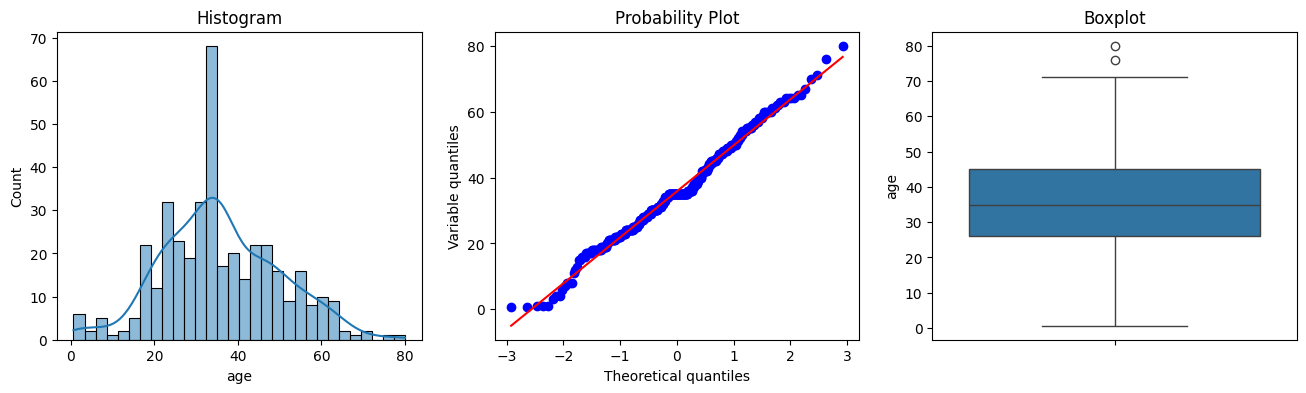

In [721]:
# memvisualisasikan outlier di LSTAT
check_plot(train_titanic, 'age')

Due to safety reasons and shared responsibility, there is a rule on the Titanic ship that children under the age of 3 are not allowed to board. The minimum age is 3 years old and the maximum age is 80 years old.

In [722]:
# EDA selesai, tahu outlier-nya, hasil cap adalah: min 3 dan max 80
data['age'].describe()

,age
count,499.000000
mean,35.791416
std,14.015770
min,0.666700
25%,25.500000
50%,35.000000
75%,45.000000
max,80.000000


In [723]:
# Lakukan capping
data['age'] = data['age'].clip(lower=3, upper=80)

In [724]:
# Verifikasi hasil
data['age'].describe()  # Verifikasi hasil capper telah masuk

,age
count,499.000000
mean,35.818637
std,13.949805
min,3.000000
25%,25.500000
50%,35.000000
75%,45.000000
max,80.000000


From the description above, the minimum age is 3 years old and the maximum age is 80 years old.

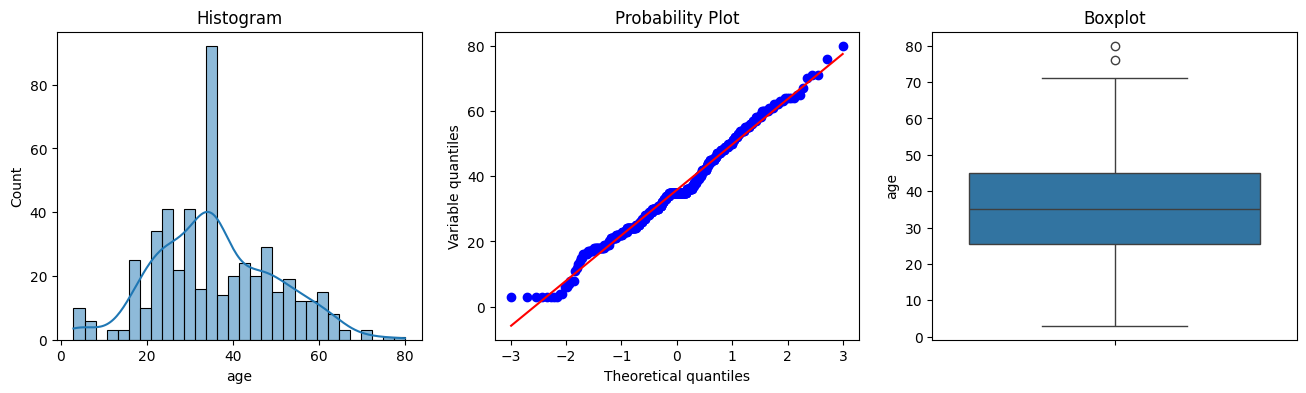

In [725]:
# memvisualisasikan outlier di LSTAT
check_plot(data, 'age')

# Feature Encoding

In [726]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])

# Fitur dan target
X = data[['sex', 'age']]
y = data['survived']


The `sex` column has been successfully converted into numerical format using `LabelEncoder`. This transformation is crucial because the Random Forest algorithm does not accept categorical input directly. At this stage, only the `sex` and `age` features are used for modeling.

# Splitting Data

In [727]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling Using Random Forest

In [728]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.89      0.80      0.84        61

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



 ## Confusion Matrix

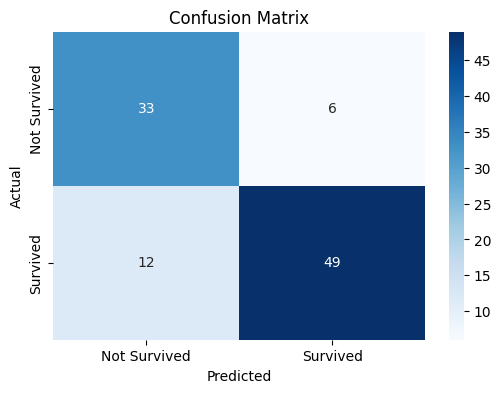

In [729]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix illustrates the number of correct and incorrect predictions made by the model. Specifically:

* True Positives (TP): Passengers correctly predicted to have survived.

* True Negatives (TN): Passengers correctly predicted not to have survived.

If most predictions fall along the diagonal (TP and TN), it indicates that the model performs well.

## Feature Importance

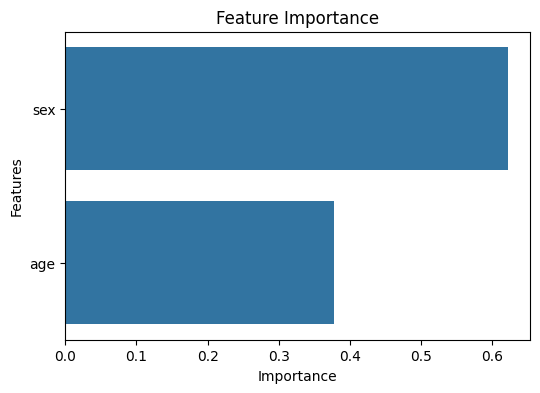

In [730]:
# Visualisasi feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The feature importance plot indicates that `sex` plays a significantly larger role in the model's prediction compared to `age`. This aligns with historical context, females were prioritized for rescue ("women and children first") and shows that the model has successfully learned this pattern from the data.

## Distribution Visualization

In [731]:
# Salin data untuk visualisasi
viz_data = data.copy()

# Kembalikan 'sex' ke label aslinya
viz_data['sex'] = le_sex.inverse_transform(viz_data['sex'])

# Tambahkan label untuk 'survived' agar grafik lebih informatif
viz_data['survived'] = viz_data['survived'].map({0: 'Not Survived', 1: 'Survived'})


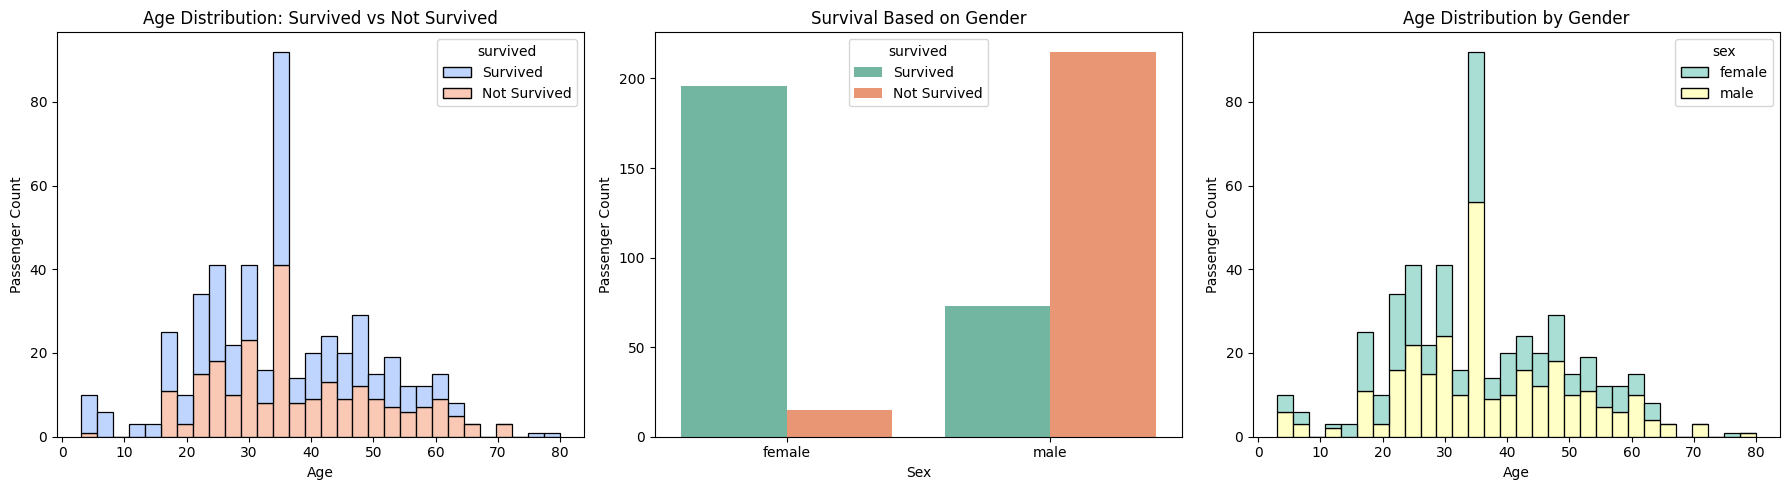

In [732]:
plt.figure(figsize=(18, 5))

# 1. Distribusi usia berdasarkan status keselamatan
plt.subplot(1, 3, 1)
sns.histplot(data=viz_data, x='age', hue='survived', multiple='stack', bins=30, palette='coolwarm')
plt.title('Age Distribution: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Passenger Count')

# 2. Survival berdasarkan gender
plt.subplot(1, 3, 2)
sns.countplot(data=viz_data, x='sex', hue='survived', palette='Set2')
plt.title('Survival Based on Gender')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')

# 3. Distribusi usia berdasarkan jenis kelamin
plt.subplot(1, 3, 3)
sns.histplot(data=viz_data, x='age', hue='sex', multiple='stack', bins=30, palette='Set3')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Passenger Count')

plt.tight_layout()
plt.show()


## Observation
The histogram of passenger age distribution, segmented by survival status, shows distinguishable patterns:

* Survivors tend to be younger.

* Older passengers are more represented in the group that did not survive.

* This supports the idea that while age has some influence on survival probability, its effect is secondary compared to the gender feature.

# Conclusion
Throughout the exploratory data analysis and modeling process, several insights were gained:

* The dataset was successfully cleaned duplicates removed, missing values imputed, and outliers handled effectively.

* The Random Forest model performed well in classifying survival status using only two features.

* Among these, sex was the most influential feature in the model, followed by age.

* Visualizations and feature importance analysis further validated these conclusions, showing that female and younger passengers had higher chances of survival because females were prioritized for rescue (women and children first)

Overall, the preprocessing steps significantly enhanced the model's performance and provided meaningful insights into the Titanic dataset.

